# EECS 16A Spring 2023 HW 15 (Optional homework)

## Problem 1: Image Analysis

In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_circle(a1, d1, e1):
    """
    You can use this function to plot circles with parameters a1,d1,e1.
    The parameters are described in the homework pdf. 
    
    """
    is_circle = d1**2 + e1**2 + 4*a1 > 0
    assert is_circle, "Not a circle"
    
    XLIM_LO = -1
    XLIM_HI = 3
    YLIM_LO = -2
    YLIM_HI = 2
    X_COUNT = 400
    Y_COUNT = 400
    
    x = np.linspace(XLIM_LO, XLIM_HI, X_COUNT)
    y = np.linspace(YLIM_LO, YLIM_HI, Y_COUNT)
    x, y = np.meshgrid(x, y)
    f = lambda x,y: a1*(x**2 + y**2) + d1*x + e1*y
    
    c1 = plt.contour(x, y, f(x,y), [1], colors='r')
    plt.axis('scaled')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Best Fit Circle")

In [3]:
def plot_ellipse(a1, b1, c1, d1, e1):
    """
    You can use this function to plot ellipses with parameters a1-e1.
    The parameters are described in the homework pdf. 
    """
    is_ellipse = b1**2 - 4*a1*c1 < 0
    assert is_ellipse, "Not an ellipse"
    
    XLIM_LO = -1
    XLIM_HI = 3
    YLIM_LO = -2
    YLIM_HI = 3
    X_COUNT = 400
    Y_COUNT = 400
    
    x = np.linspace(XLIM_LO, XLIM_HI, X_COUNT)
    y = np.linspace(YLIM_LO, YLIM_HI, Y_COUNT)
    x, y = np.meshgrid(x, y)
    f = lambda x,y: a1*x**2 + b1*x*y + c1*y**2 + d1*x + e1*y
    
    c1 = plt.contour(x, y, f(x,y), [1], colors='r')
    plt.axis('scaled')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Best Fit Ellipse")

Text(0.5, 1.0, 'Ellipse with parameters (-1, 0, -1, 2, 2)')

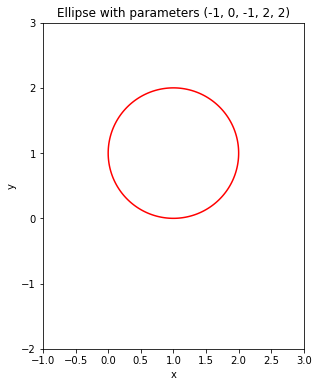

In [4]:
# Here is an example of plot_ellipse.
# This plots (x-1)**2 + (y-1)**2 = 1, 
# which is a circle centered at (1,1). 

plt.figure(figsize=(6,6))
plot_ellipse(-1, 0, -1, 2, 2)
plt.title('Ellipse with parameters (-1, 0, -1, 2, 2)')

### Part (c)

In [5]:
# PART C

xy = np.array([[0.3, -0.69],
               [0.5, 0.87],
               [0.9, -0.86],
               [1, 0.88],
               [1.2, -0.82],
               [1.5, .64],
               [1.8, 0]])
x = xy[:,0]
y = xy[:,1]

# plot the data points
plt.scatter(x,y)

# First we compute our estimated coefficients
A = np.array([x**2+y**2,x,y]).T 
b = np.ones((7,))
circle_params = # YOUR CODE HERE
print(circle_params)

# Then we plot
plt.figure(figsize=(6,6))
plot_circle(circle_params[0], circle_params[1], circle_params[2])
plt.scatter(x,y, color='k')

# Compute error
e = # YOUR CODE HERE
print("e = {}\n".format(e))

e_magnitude = # YOUR CODE HERE

print("||e|| = {}\n".format(e_magnitude))
N = 7
print("||e|| / N = {}\n".format(e_magnitude / N))

SyntaxError: invalid syntax (<ipython-input-5-69f7c9743ed5>, line 19)

In [ ]:
# PART D

# Plot the data points
plt.scatter(x,y)


A = # YOUR CODE HERE 
b = # YOUR CODE HERE

ellipse_params = # YOUR CODE HERE
print(ellipse_params)
plot_ellipse(ellipse_params[0],ellipse_params[1],ellipse_params[2],ellipse_params[3],ellipse_params[4])

# Compute error
e = # YOUR CODE HERE
print("e = {}\n".format(e))

e_magnitude = # YOUR CODE HERE

print("||e|| = {}\n".format(e_magnitude))
N = 7
print("||e|| / N = {}\n".format(e_magnitude / N))

## Problem 2: Labeling Patients Using Gene Expression Data

### Part (b)

In [34]:
#Load training data
A = np.load('gene_data_train.npy')
b = np.load('diabetes_train.npy')

In [ ]:
#Calculate the coefficients using the train set

x = # YOUR CODE HERE

print(x)

Check to make sure your model gives the correct answer for the training set.

In [ ]:
#Training set sanity check - compare model outputs with training outputs
b_new = np.sign(A.dot(x))
print(b - b_new) # All differences should be zero

### Part (c)

In [15]:
#Load test data
A_test = np.load('gene_data_test.npy')
b_test = np.load('diabetes_test.npy')

In [ ]:
#Use your alpha coefficients (vector x) on the test set and check their acuracy by finding the error vector
b_calc = np.sign(A_test.dot(x))
print(b_calc)
print(b_calc - b_test)

## Problem 3: How Much is Too Much?

Some setup code

In [16]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt

%matplotlib inline

"""Function that defines the polynomial curve for a set of 
parameters and a range. The set of parameters defines the 
degree of the polynomial."""
def poly_curve(params,x_input):
    # params contains the coefficients that multiply the polynomial terms, in degree of lowest degree to highest degree
    degree=len(params)-1
    x_range=[x_input[1], x_input[-1]]
    x=np.linspace(x_range[0],x_range[1],1000)
    y=x*0
    
    for k in range(0,degree+1):
        coeff=params[k]
        y=y+list(map(lambda z:coeff*z**k,x))        
    return x,y
    
"""Function that defines a data matrix for some input data."""
def data_matrix(input_data,degree): 
    # degree is the degree of the polynomial you plan to fit the data with    
    Data=np.zeros((len(input_data),degree+1))
    
    for k in range(0,degree+1):
        Data[:,k]=(list(map(lambda x:x**k ,input_data)))
                  
    return Data

"""Function that computes the Least Squares Approximation"""
def leastSquares(D,y): 
    return np.linalg.lstsq(D,y)[0]
                  
np.random.seed(10)

### Part a) 
Some setup code to create our Resistor test Data points and plot them

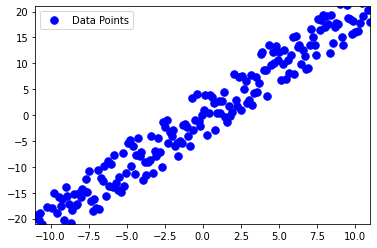

In [17]:
R = 2
x_a = np.linspace(-11,11,200)
y_a = R*x_a + (np.random.rand(len(x_a))-0.5)*10
fig = plt.figure()
ax=fig.add_subplot(111,xlim=[-11,11],ylim=[-21,21])
ax.plot(x_a,y_a, '.b', markersize=15)
ax.legend(['Data Points'])

Let's calculate a polynomial approximation of the above device. 

<ipython-input-16-035e6c53a709>:34: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(D,y)[0]


Text(0.5, 1.0, 'Polynomial of Degree 15')

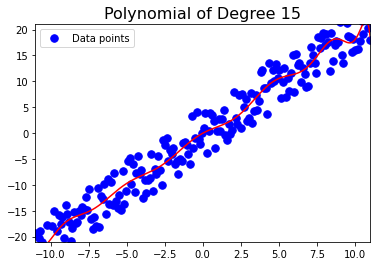

In [18]:
degree=15
D_a = data_matrix(x_a,degree)
p_a = leastSquares(D_a, y_a)

fig=plt.figure()
ax=fig.add_subplot(111,xlim=[-11,11],ylim=[-21,21])
x_a_,y_a_=poly_curve(p_a,x_a)
ax.plot(x_a,y_a,'.b',markersize=15)
ax.plot(x_a_, y_a_, 'r')
ax.legend(['Data points'])
plt.title('Polynomial of Degree %d' %(len(p_a)-1),fontsize=16)

### Part b)

In [19]:
def cost(x, y, start, end):
    """Given a set of x and y points, this function 
    calculates polynomial approximations of varying 
    degrees from start to end and returns the cost 
    of each degree in an array"""
    c = []
    for degree in range(start, end):
        D = data_matrix(x,degree)
        params = leastSquares(D,y)
        error = np.linalg.norm(y-np.dot(D,params))
        c.append(error)
    return c

<ipython-input-16-035e6c53a709>:34: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(D,y)[0]


Text(0.5, 1.0, 'Cost vs Degree')

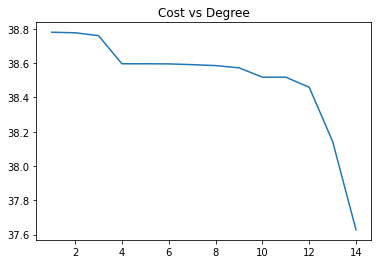

In [20]:
start = 1
end = 15
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(range(start, end), cost(x_a,y_a,start,end))
plt.title('Cost vs Degree')